In [1]:
from neuron import h, gui
import LFPy
import numpy as np
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from LFPy import InfiniteHomogeneousVolCondMEG
from lfpykit import LineSourcePotential

In [2]:
h.load_file('stdrun.hoc')
h.load_file('stdrun.hoc')
cvode = h.CVode()
try:
    cvode.use_fast_imem(1)
except AttributeError:
    raise Exception('neuron.h.CVode().use_fast_imem() method not '
                    'found. Update NEURON to v.7.4 or newer')

seg_len = 2
sigma = 0.3  # extracellular conductivity

cellParameters = {
    'dt': 2**-6,
    'tstart': -10,
    'tstop': 50,
    'v_init': -65,
    'pt3d': True,
    'nsegs_method': None,
}


|-----------------------------------------------------------------------------------------------------|       axon(0-1)



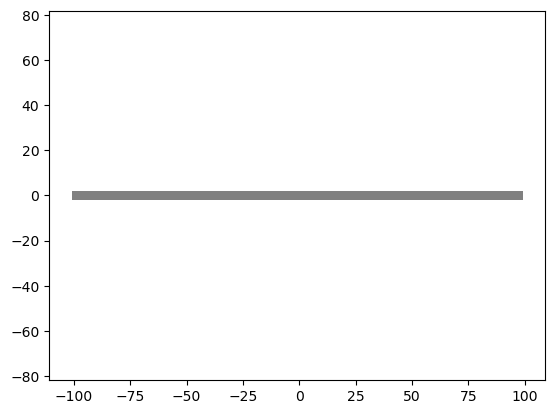

0.1799945408929623 6.1999017031411086e-15
0.024194003538027947 -6.493709649862955e-14
0.0011455614578662198 2.2557314089538538e-14


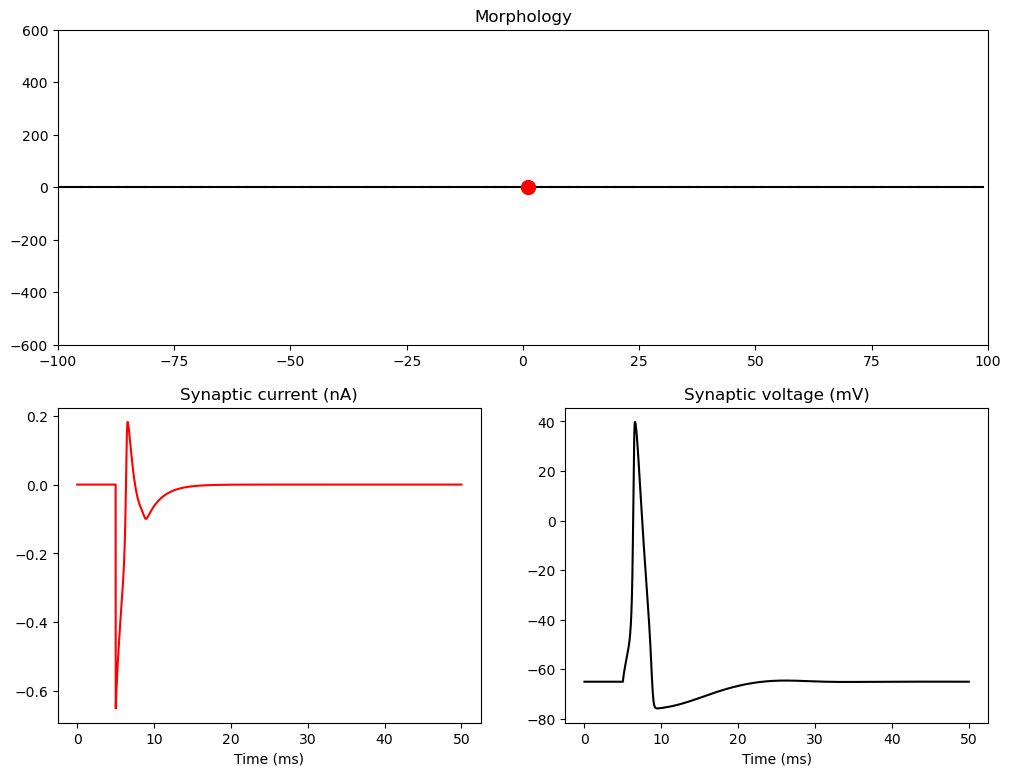

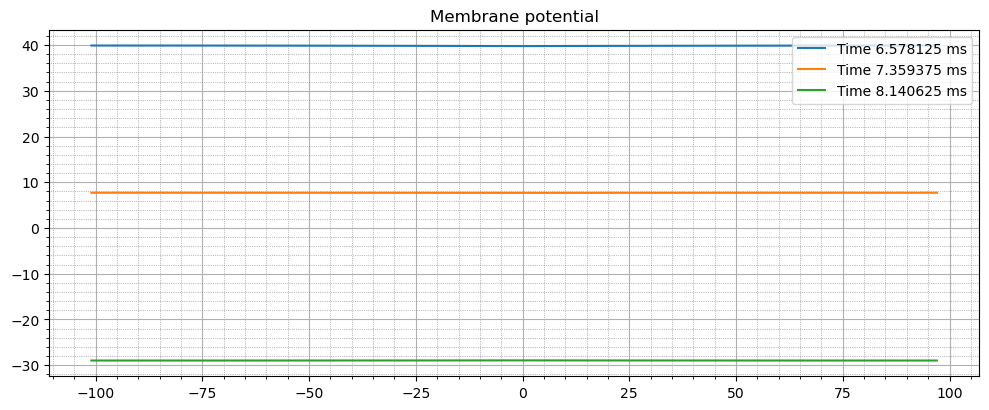

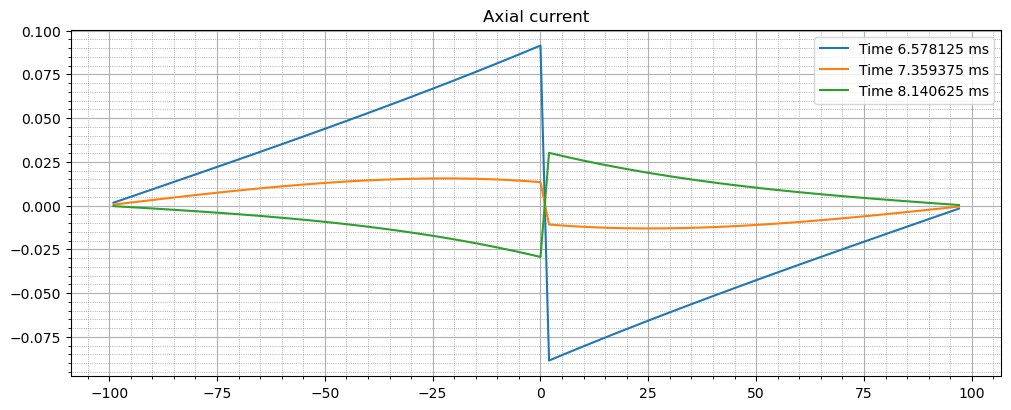

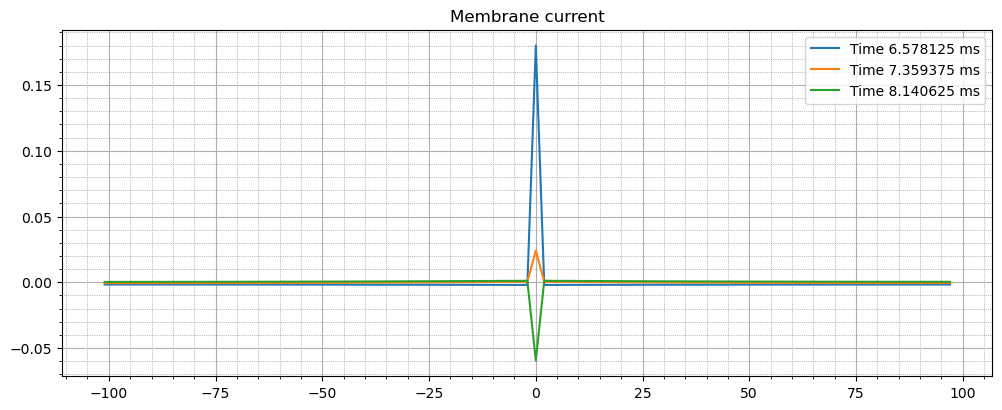

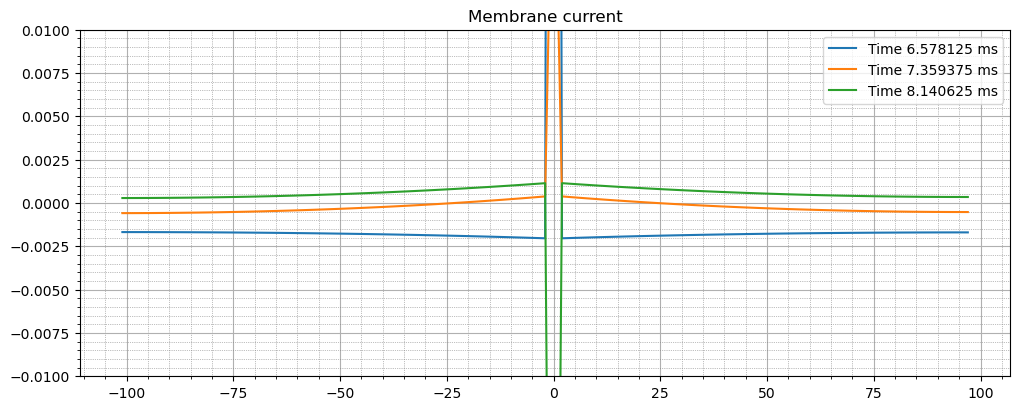

In [49]:
axon_length = 200  # Axon length in um
axon_diameter = 4  # Axon diameter in um

axon = h.Section(name='axon')
axon.L = axon_length
axon.diam = axon_diameter
axon.nseg = (int(axon.L/seg_len) // 2) * 2 + 1
axon.insert("hh")

h.topology()

# Create cell
cell = LFPy.Cell(morphology=h.allsec(), **cellParameters)

# Set the cell's position
cell.set_pos(x=-axon_length/2, y=0, z=0)
#cell.set_rotation(y=-np.pi/2)

# Plot cell geometry
zips = []
for x, z in cell.get_idx_polygons():
    zips.append(list(zip(x, z)))
    
polycol = PolyCollection(zips, edgecolors='none', facecolors='gray')

fig, ax = plt.subplots(1)
ax.add_collection(polycol)
ax.axis(ax.axis('equal'))
plt.show()

# Setup cell stimulation
synapseParameters = {
    'idx': cell.get_closest_idx(x=0., y=0., z=0.),
    'e': 0,
    'syntype': 'ExpSyn', 
    'weight': 0.01,
    'tau': 2,
    'record_current': True,
}

synapse = LFPy.Synapse(cell, **synapseParameters)
synapse.set_spike_times(np.array([5]))

# Simulate cell
cell.simulate(rec_imem=True, rec_vmem=True)

iaxial, d, pos = cell.get_axial_currents_from_vmem()

center_idx = int((axon.nseg - 1)/2)

plt.figure(figsize=(12, 9))
plt.subplot(223)
plt.plot(cell.tvec, synapse.i, 'r')
plt.xlabel('Time (ms)')
plt.title('Synaptic current (nA)')
plt.subplot(224)
plt.plot(cell.tvec, cell.vmem[center_idx], 'k')
plt.xlabel('Time (ms)')
plt.title('Synaptic voltage (mV)')
plt.subplot(211)
plt.plot(cell.x.T, cell.z.T, 'k')
plt.plot(synapse.x, synapse.z,
         color='r', marker='o', markersize=10)
plt.axis([-axon_length/2, axon_length/2, -600, 600])
plt.title('Morphology')

spike_idx = np.argmax(cell.vmem[center_idx])
    
plt.figure(figsize=(12, 4.5))
plt.title('Membrane potential')
for i in range(spike_idx, spike_idx+150, 50):
    plt.plot(cell.x.T[0,:], cell.vmem[:,i], label=f"Time {cell.tvec[i]} ms")
plt.legend(loc='upper right')
plt.grid(True)
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5) 

plt.figure(figsize=(12, 4.5))
plt.title('Axial current')
for i in range(spike_idx, spike_idx+150, 50):
    plt.plot(cell.x.T[0,1:], iaxial[1::2,i], label=f"Time {cell.tvec[i]} ms")
plt.legend(loc='upper right')
plt.grid(True)
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5) 

plt.figure(figsize=(12, 4.5))
plt.title('Membrane current')
for i in range(spike_idx, spike_idx+150, 50):
    plt.plot(cell.x.T[0,:], cell.imem[:,i], label=f"Time {cell.tvec[i]} ms")
plt.legend(loc='upper right')
plt.grid(True)
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5) 

plt.figure(figsize=(12, 4.5))
plt.title('Membrane current')
for i in range(spike_idx, spike_idx+150, 50):
    plt.plot(cell.x.T[0,:], cell.imem[:,i], label=f"Time {cell.tvec[i]} ms")
    plt.ylim(-0.01, 0.01)
    print(max(cell.imem[:,i]), sum(cell.imem[:,i]))
plt.legend(loc='upper right')
plt.grid(True)
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5) 


|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

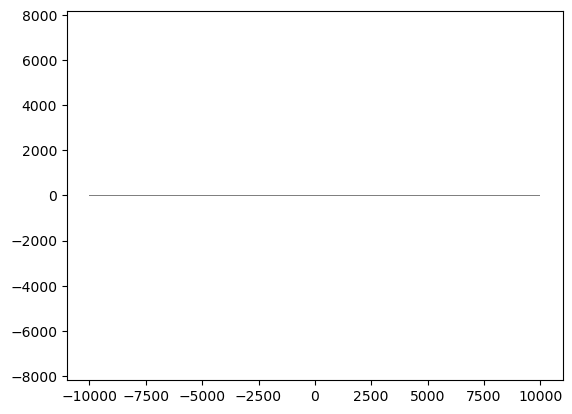

0.23634689943079237 -3.076764243969076e-13
0.030582623760968774 8.625406086221842e-14
0.03116989177475722 -1.7960673746240692e-13


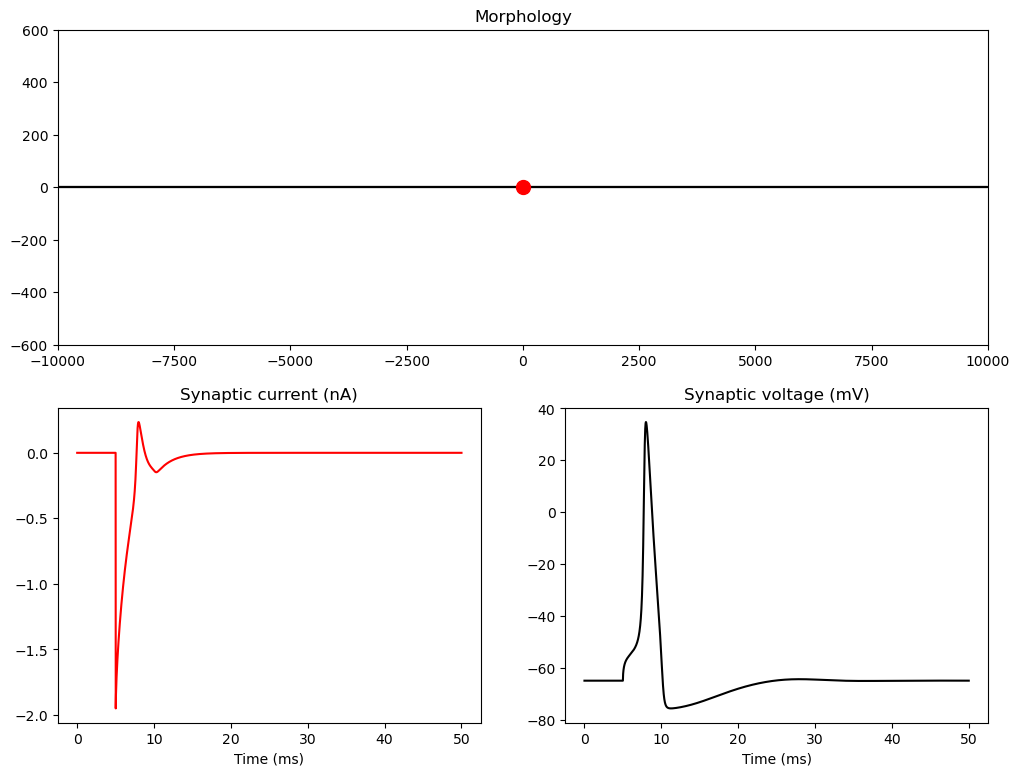

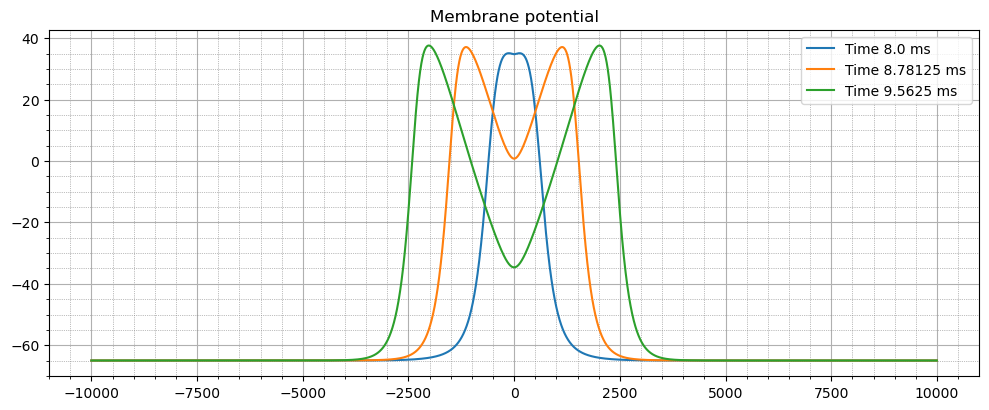

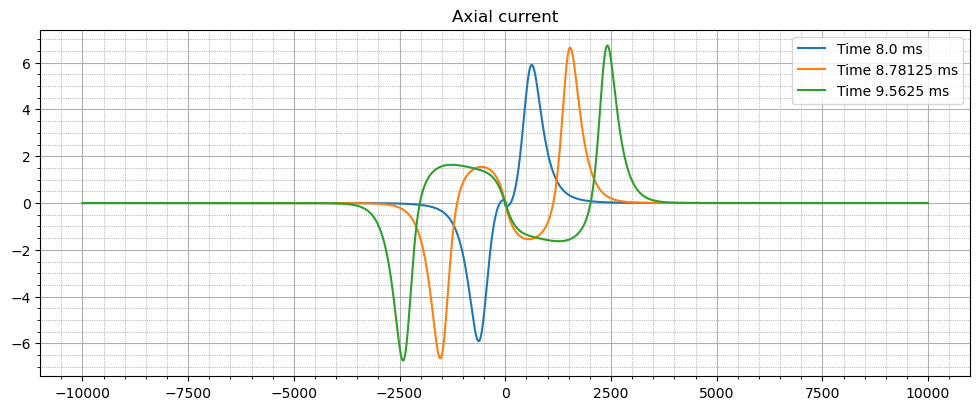

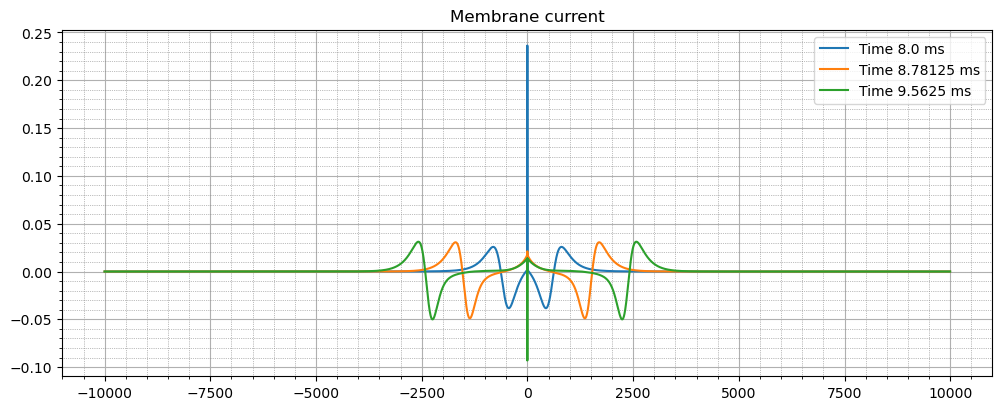

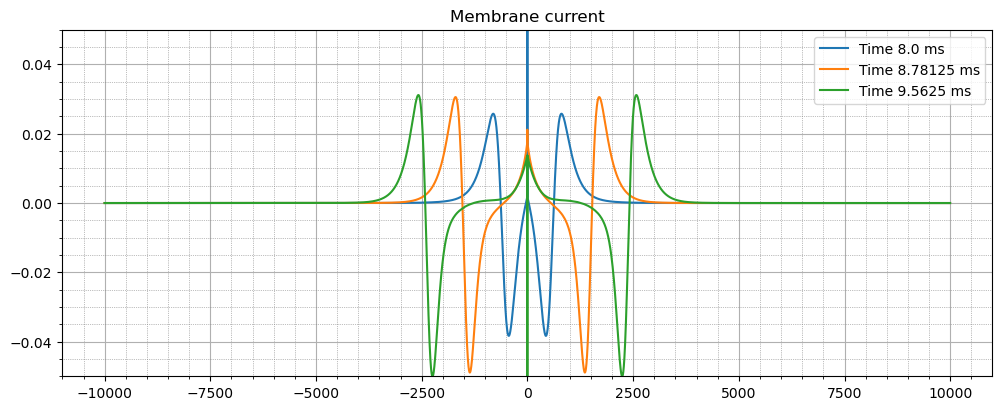

In [51]:
axon_length = 20000  # Axon length in um
axon_diameter = 4  # Axon diameter in um

axon = h.Section(name='axon')
axon.L = axon_length
axon.diam = axon_diameter
axon.nseg = (int(axon.L/seg_len) // 2) * 2 + 1
axon.insert("hh")

h.topology()

# Create cell
cell = LFPy.Cell(morphology=h.allsec(), **cellParameters)

# Set the cell's position
cell.set_pos(x=-axon_length/2, y=0, z=0)
#cell.set_rotation(y=-np.pi/2)

# Plot cell geometry
zips = []
for x, z in cell.get_idx_polygons():
    zips.append(list(zip(x, z)))
    
polycol = PolyCollection(zips, edgecolors='none', facecolors='gray')

fig, ax = plt.subplots(1)
ax.add_collection(polycol)
ax.axis(ax.axis('equal'))
plt.show()

# Setup cell stimulation
synapseParameters = {
    'idx': cell.get_closest_idx(x=0., y=0., z=0.),
    'e': 0,
    'syntype': 'ExpSyn', 
    'weight': 0.03,
    'tau': 2,
    'record_current': True,
}

synapse = LFPy.Synapse(cell, **synapseParameters)
synapse.set_spike_times(np.array([5]))

# Simulate cell
cell.simulate(rec_imem=True, rec_vmem=True)

iaxial, d, pos = cell.get_axial_currents_from_vmem()

center_idx = int((axon.nseg - 1)/2)

plt.figure(figsize=(12, 9))
plt.subplot(223)
plt.plot(cell.tvec, synapse.i, 'r')
plt.xlabel('Time (ms)')
plt.title('Synaptic current (nA)')
plt.subplot(224)
plt.plot(cell.tvec, cell.vmem[center_idx], 'k')
plt.xlabel('Time (ms)')
plt.title('Synaptic voltage (mV)')
plt.subplot(211)
plt.plot(cell.x.T, cell.z.T, 'k')
plt.plot(synapse.x, synapse.z,
         color='r', marker='o', markersize=10)
plt.axis([-axon_length/2, axon_length/2, -600, 600])
plt.title('Morphology')

spike_idx = np.argmax(cell.vmem[center_idx])
    
plt.figure(figsize=(12, 4.5))
plt.title('Membrane potential')
for i in range(spike_idx, spike_idx+150, 50):
    plt.plot(cell.x.T[0,:], cell.vmem[:,i], label=f"Time {cell.tvec[i]} ms")
plt.legend(loc='upper right')
plt.grid(True)
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5) 

plt.figure(figsize=(12, 4.5))
plt.title('Axial current')
for i in range(spike_idx, spike_idx+150, 50):
    plt.plot(cell.x.T[0,1:], iaxial[1::2,i], label=f"Time {cell.tvec[i]} ms")
plt.legend(loc='upper right')
plt.grid(True)
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5) 

plt.figure(figsize=(12, 4.5))
plt.title('Membrane current')
for i in range(spike_idx, spike_idx+150, 50):
    plt.plot(cell.x.T[0,:], cell.imem[:,i], label=f"Time {cell.tvec[i]} ms")
plt.legend(loc='upper right')
plt.grid(True)
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5) 

plt.figure(figsize=(12, 4.5))
plt.title('Membrane current')
for i in range(spike_idx, spike_idx+150, 50):
    plt.plot(cell.x.T[0,:], cell.imem[:,i], label=f"Time {cell.tvec[i]} ms")
    plt.ylim(-0.05, 0.05)
    print(max(cell.imem[:,i]), sum(cell.imem[:,i]))
plt.legend(loc='upper right')
plt.grid(True)
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5) 


|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

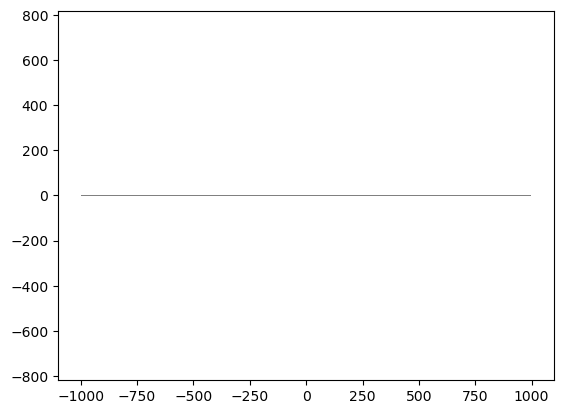

427
527
627
0.0005163501850419115 -2.9438257387326416e-15
0.07025355733710784 -2.962343911838694e-14
0.00643489252408342 6.645725636467148e-15


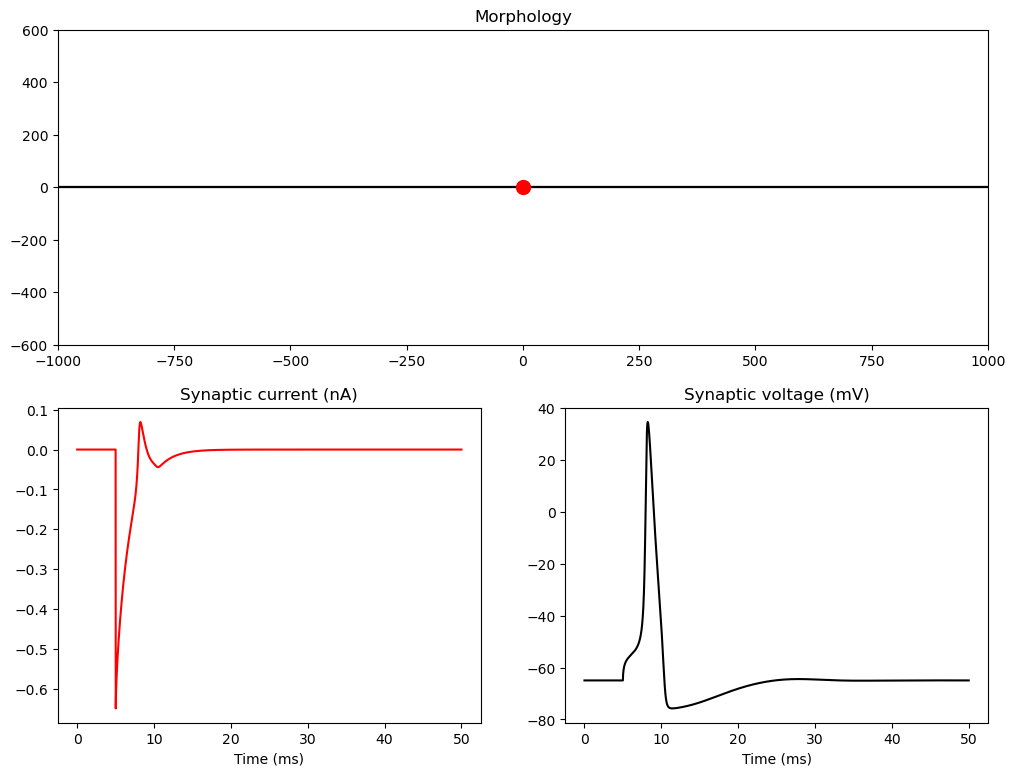

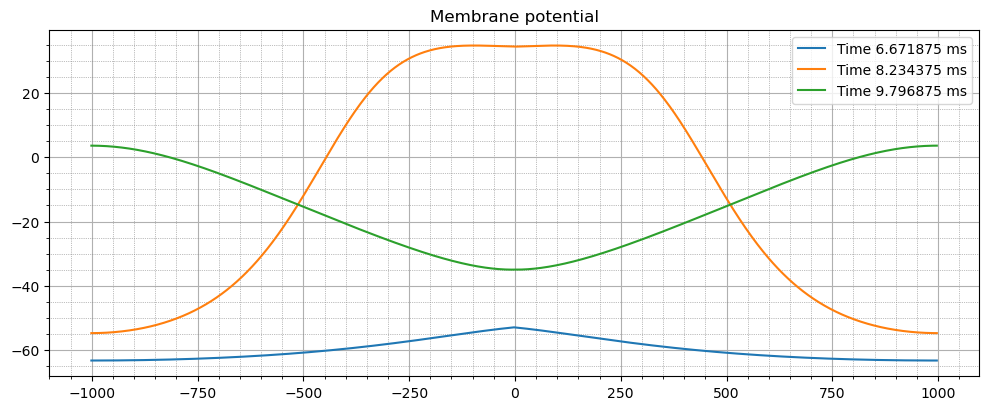

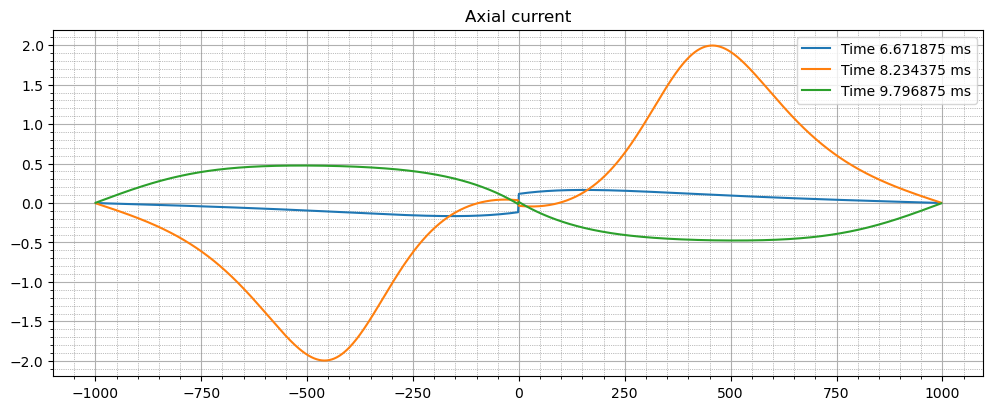

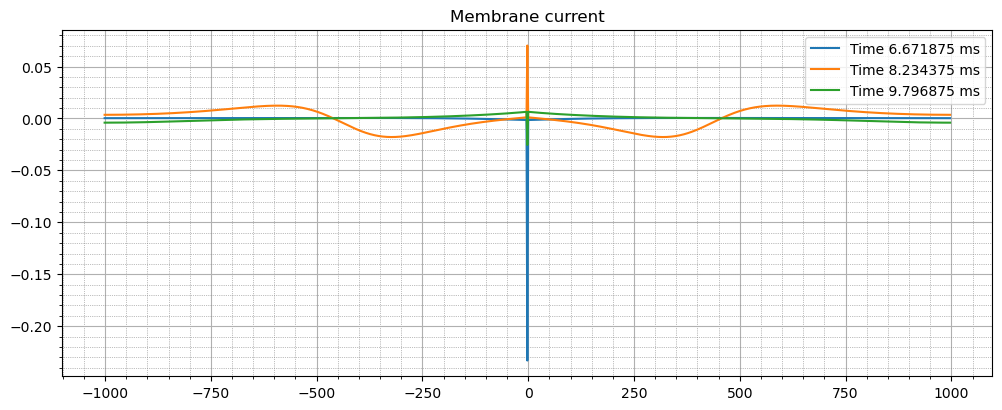

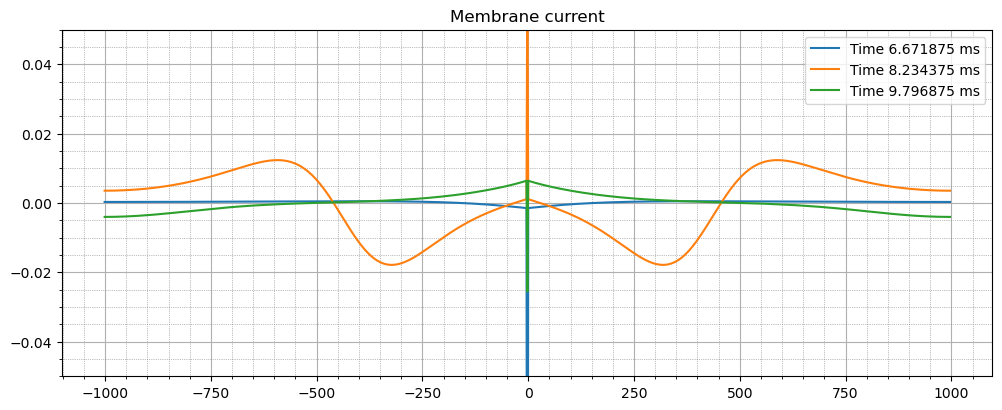

In [23]:
axon_length = 2000  # Axon length in um
axon_diameter = 2  # Axon diameter in um

axon = h.Section(name='axon')
axon.L = axon_length
axon.diam = axon_diameter
axon.nseg = (int(axon.L/seg_len) // 2) * 2 + 1
axon.insert("hh")

h.topology()

# Create cell
cell = LFPy.Cell(morphology=h.allsec(), **cellParameters)

# Set the cell's position
cell.set_pos(x=-axon_length/2, y=0, z=0)
#cell.set_rotation(y=-np.pi/2)

# Plot cell geometry
zips = []
for x, z in cell.get_idx_polygons():
    zips.append(list(zip(x, z)))
    
polycol = PolyCollection(zips, edgecolors='none', facecolors='gray')

fig, ax = plt.subplots(1)
ax.add_collection(polycol)
ax.axis(ax.axis('equal'))
plt.show()

# Setup cell stimulation
synapseParameters = {
    'idx': cell.get_closest_idx(x=0., y=0., z=0.),
    'e': 0,
    'syntype': 'ExpSyn', 
    'weight': 0.01,
    'tau': 2,
    'record_current': True,
}

synapse = LFPy.Synapse(cell, **synapseParameters)
synapse.set_spike_times(np.array([5]))

# Simulate cell
cell.simulate(rec_imem=True, rec_vmem=True)

iaxial, d, pos = cell.get_axial_currents_from_vmem()

center_idx = int((axon.nseg - 1)/2)

plt.figure(figsize=(12, 9))
plt.subplot(223)
plt.plot(cell.tvec, synapse.i, 'r')
plt.xlabel('Time (ms)')
plt.title('Synaptic current (nA)')
plt.subplot(224)
plt.plot(cell.tvec, cell.vmem[center_idx], 'k')
plt.xlabel('Time (ms)')
plt.title('Synaptic voltage (mV)')
plt.subplot(211)
plt.plot(cell.x.T, cell.z.T, 'k')
plt.plot(synapse.x, synapse.z,
         color='r', marker='o', markersize=10)
plt.axis([-axon_length/2, axon_length/2, -600, 600])
plt.title('Morphology')

spike_idx = np.argmax(cell.vmem[center_idx])
    
plt.figure(figsize=(12, 4.5))
plt.title('Membrane potential')
for i in range(spike_idx-100, spike_idx+200, 100):
    print(i)
    plt.plot(cell.x.T[0,:], cell.vmem[:,i], label=f"Time {cell.tvec[i]} ms")
plt.legend(loc='upper right')
plt.grid(True)
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5) 

plt.figure(figsize=(12, 4.5))
plt.title('Axial current')
for i in range(spike_idx-100, spike_idx+200, 100):
    plt.plot(cell.x.T[0,1:], iaxial[1::2,i], label=f"Time {cell.tvec[i]} ms")
plt.legend(loc='upper right')
plt.grid(True)
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5) 

plt.figure(figsize=(12, 4.5))
plt.title('Membrane current')
for i in range(spike_idx-100, spike_idx+200, 100):
    plt.plot(cell.x.T[0,:], cell.imem[:,i], label=f"Time {cell.tvec[i]} ms")
plt.legend(loc='upper right')
plt.grid(True)
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5) 

plt.figure(figsize=(12, 4.5))
plt.title('Membrane current')
for i in range(spike_idx-100, spike_idx+200, 100):
    plt.plot(cell.x.T[0,:], cell.imem[:,i], label=f"Time {cell.tvec[i]} ms")
    plt.ylim(-0.05, 0.05)
    print(max(cell.imem[:,i]), sum(cell.imem[:,i]))
plt.legend(loc='upper right')
plt.grid(True)
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5) 

In [20]:
range(spike_idx-100, spike_idx+100, 100)

range(427, 627, 100)

In [22]:
spike_idx-100

427